<tr>
    <td> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="40%" height="40%" align='left' /> </td>
    <td> <img src="https://pbs.twimg.com/profile_images/509039793225728001/G9EIJloB_400x400.jpeg" title="Title text" width="40%" height="40%" align='right'/> </td>
</tr>

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" height="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>
<h2 align='center'> Tarea 1</h2>

> - Cristian Chamorro Brant; 201673506-2
> - Eduardo Padilla Castillo; 201673571-2

<hr style="height:2px;border:none"/>

## 1. Máquinas de aprendizaje aplicadas a la medicina

<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="35%" />

### Imports de los datos a trabajar:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'


pd.options.mode.chained_assignment = None  # default='warn'

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

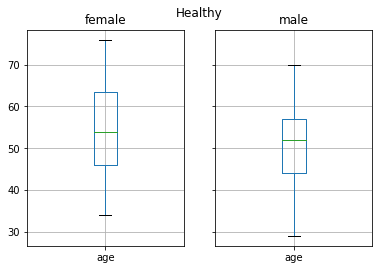

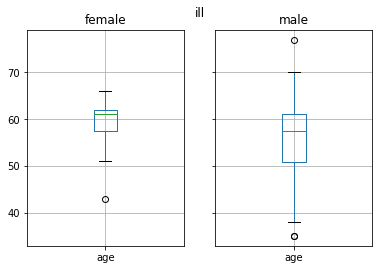

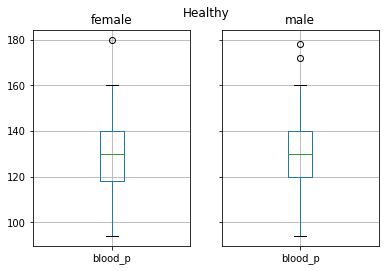

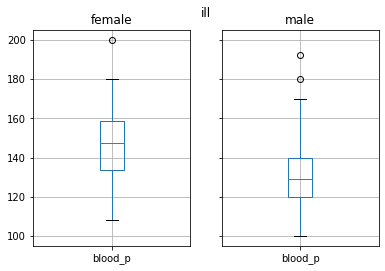

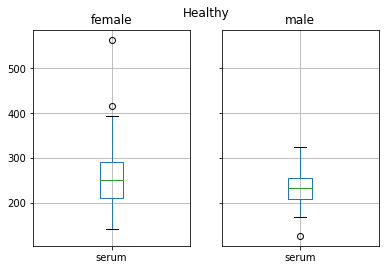

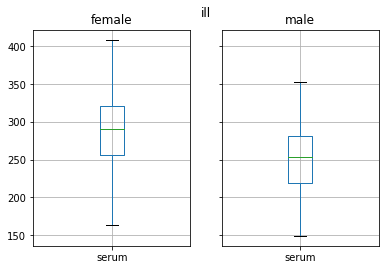

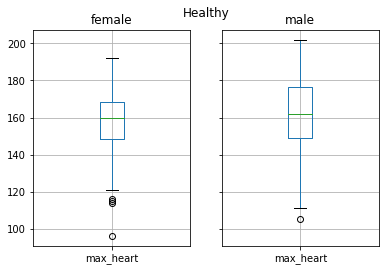

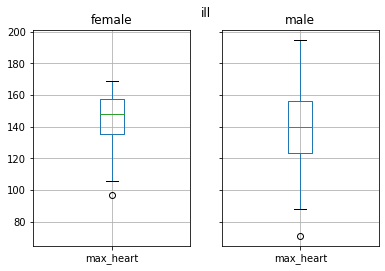

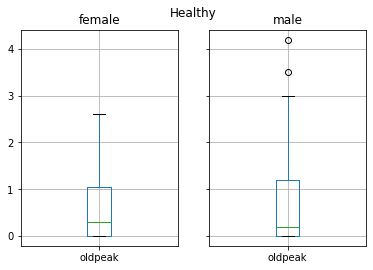

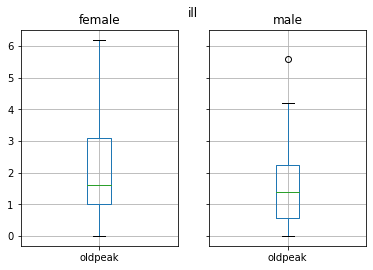

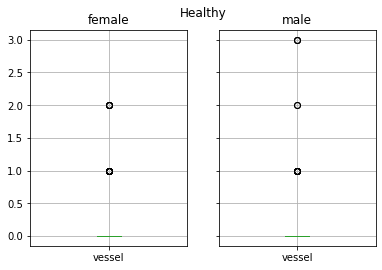

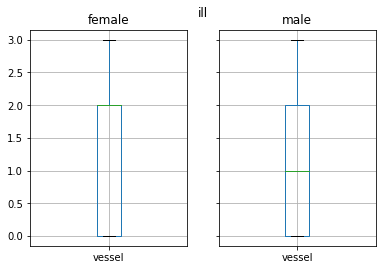

In [3]:
df_healthy = df[df.normal != 2]
df_ill = df[df.normal != 1]


numerical_columns = ['age','blood_p','serum','max_heart','oldpeak','vessel']

for col in numerical_columns:
    
    df_healthy.groupby('sex').boxplot(column = col)
    plt.suptitle('Healthy')
    df_ill.groupby('sex').boxplot(column = col)
    plt.suptitle('ill')
    


Con respecto a los boxplot de los enfermos podemos notar que:
    Edad:
        Las mujeres presentan un rango mas pequeño de edad, con mayor presencia desde los 46 a los 62 años aprox, a diferencia de los hombres en que las edades se encuentran mas repartidas, con mayor presencia entre los 51 hasta los 61 años.
    Presion sanguinea:
        Las mujeres presentan en general mayor presion que los hombre, dado que el tercer cuartil de los hombres (140) es  similar al primer cuartil de las mujeres (135 aprox)
    Suero sanguineo (serum):
        Nuevamente las mujeres presentan una mayor cantidad, en este caso la mediana del serum femenino(290) es al menos mayor que el 75% de los suerum masculinos (280), se debe notar que el rango total en las mujeres es mayor (250 aprox) que el de los hombre (200)
    Max_heart:
        En este caso el rango de los hombres es mayor (100 aprox) con respecto a las mujeres (60), presentando tercer quartiles similares pero con mediana y primer quartil mayor en las mujeres.
     oldpeak:
         En este caso existen medianas similares, en donde la mujer presenta el primer y tercel quartil mas grande que los hombres, los hombre concentran su 50% de los datos en un rango mas pequeño (entre 0,5 y 2,2 aprox).
      vessel: 
          No se presentan diferencias, ambos tienden a tener el 75% de los datos entre 0 y 2.
      
Ahora comparando los casos generales entre los enfermos y sanos:
    Edad:
        La gente sana tiende a estar dentro de rangos mayores de edad, por ejemplo los hombre enfermos tienen un rango menor (de los 38 a los 70 años) a diferencia de los sanos (28 a los 70 años)
    Presion sanguinea:
        En este caso los datos se encuentran repartidos de forma similar en los enfermos y sanos, pero presentando maximas mayores en los enfermos llegando hasta los 180, a diferencia de los sanos que solo van hasta los 160, ademas los sanos presentan minimas mas pequeñas que los enfermos (80 comparado con 100/120)
     Suero sanguineo (serum):
         No existe una diferencia considerable, excepto por un par de outliers en los enfermos que superan en gran medida a los valores de los sanos (con valor extremo de 550 aprox)
     Max_heart:
         En este caso los enfermos tienden a tener menor minima y maxima que los sanos, presentando en general valores mayores en la gente sana
     oldpeak:
         En el caso de los enfermos tiende a tener valor mayores que en los sanos, presentando valores mayor a 1 en su mayoria a diferencia de los sanos que van desde los 0 a 1.
     Vessel:
         Existe una clara diferencia ya que casi en su totalidad de los sanos presentan valor de 0.
      

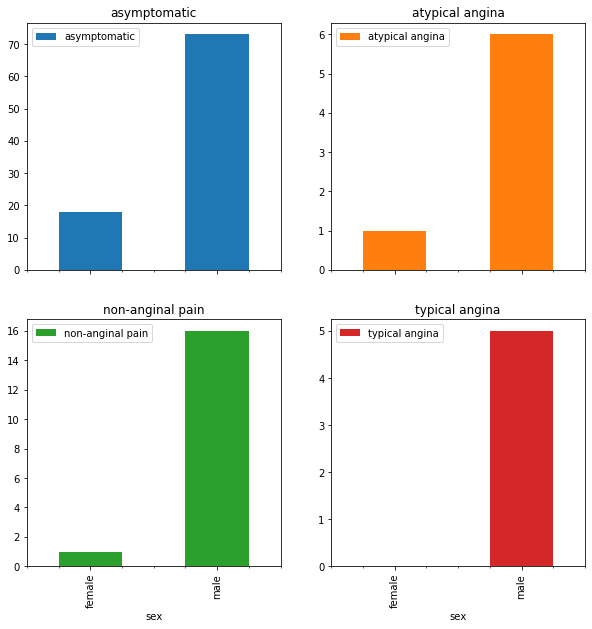

In [3]:
df_icp = df_ill.groupby('sex').chest_pain.value_counts().sort_index()
ill_chest_pain = df_icp.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize = (10,10))

En general se puede apreciar que los enfermos tienden a presentar en mayor medida un dolor de pecho asintomatico, con cantidades de mas de doble o el triple que los otros tipos.

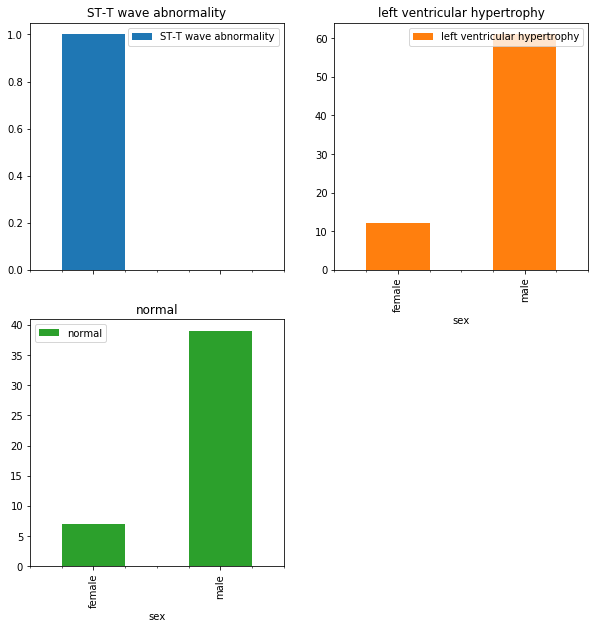

In [4]:
df_icp = df_ill.groupby('sex').electro.value_counts().sort_index()
ill_chest_pain = df_icp.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize = (10,10))

En este caso las mujeres presentan el unico caso de ST-T abnormality, pero con una presencia clara y similar en los resultados normales y Hipertrofia del ventrículo izquierdo en el caso del electro.

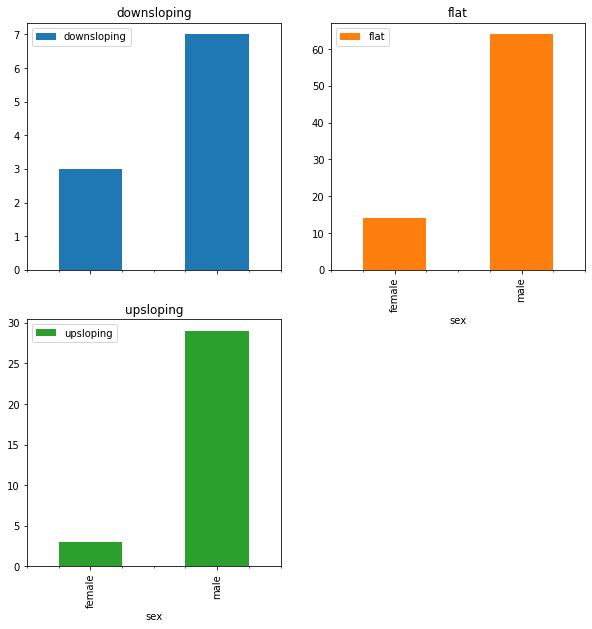

In [5]:
df_icp = df_ill.groupby('sex').slope.value_counts().sort_index()
ill_chest_pain = df_icp.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize = (10,10))

En este caso no entendemos bien a que se refiere, pero podemos observar una mayor tendecia a tener flat y upsloping en los enfermos.

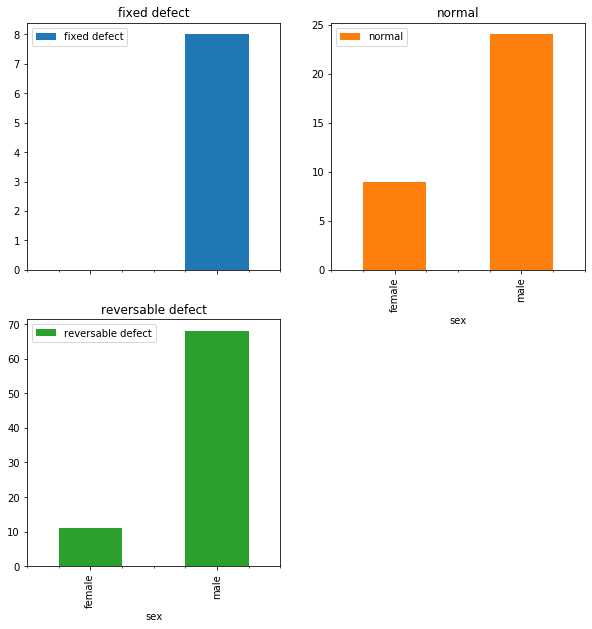

In [6]:
df_icp = df_ill.groupby('sex').thal.value_counts().sort_index()
ill_chest_pain = df_icp.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize = (10,10))

Para el caso de la anemia (thalassemia) se observa una clara presencia de un defecto reversible en los enfermos y con pocos casos de un defecto ya tratado.

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**


In [11]:
df = pd.get_dummies(df)
df.head()



,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Como se vió en el inciso anterior, los datos categóricos pueden ser de mucha utilidad o de mucho peso para el modelo. Sin embargo, el que esten representados por un texto o un índice, dificulta en gran medida su manejo en el modelo. Es por lo anterior que, el representar estos datos en formato *one hot vectors* facilita su manejo en el modelo y posteriormente que tanto influyen en el problema que se esta modelando.

### Predecir la presión sanguínea

En primera instancia trabajaremos en el dominio de regresión para predecir el comportamiento de alguna de las variables involucradas con el fin de entender cómo se comportan y si es posible estimar alguna de ellas a partir de las otras. Como ayuda se le indica que una alta presión sanguínea (*blood preasure*) podría ser un indicador de riesgo en temas cardíacos, en específico, para el problema se le comenta la hipótesis de que el comportamiento anormal de la variable presión sanguínea es un buen indicador para la detección de enfermedades cardíacas. 
Su objetivo dada esta información será la de predecir el comportamiento de esta variable en función de las otras, para luego detectar qué tan distante es el valor real al valor predecido y así detectar las enfermedades.


> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

In [12]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
X_data = df.values

> d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [13]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 

reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**.

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

Al estandarizar los datos de entrada del modelo, estamos forzando a que la media de estos sea igual a cero y que su varianza sea igual a 1. Esto facilita el manejo de dichos datos. También es importante la normalización dado que, muchos supuestos que se hacen al generar las predicciones del modelo se basan en la normalidad. Otro efecto importante que se logra es que todos los datos quedaran dentro de un mismo orden de magnitud facilitando nuevamente la visualización y manejo de estos.

> f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

<function matplotlib.pyplot.show(*args, **kw)>

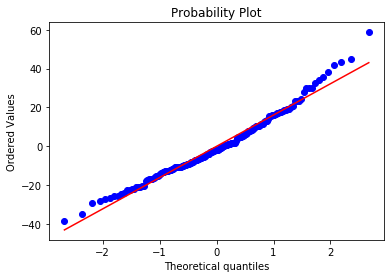

In [15]:
from sklearn.linear_model import LinearRegression
from scipy import stats

model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)

reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)


errores = reg_label_train-reg_pred_train

stats.probplot(errores, plot=plt)

plt.show
#print(model.coef_, model.intercept_)

Haciendo un análisis del qqplot, el cual enfrenta los residuos del modelo a una distribución normal, se puede concluir que la hipótesis de que dichos residuos se distribuyen normal estandar es acertada. Lo anterior se fundamenta en que los datos tienden a ser lineales en el gráfico.

> g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?


In [16]:
def sumatoria_denominador_z_score(data):
    
    sumatoria_denominador_z_score_array = []
    for i in range(data.shape[1]):
        
        var_i_data = data[:, i]
        mean = var_i_data.mean()
        suma = 0
        for dato in var_i_data:
            suma += (dato-mean)**2
            
        sumatoria_denominador_z_score_array.append(suma**0.5)
    
    return sumatoria_denominador_z_score_array

def sumatoria_denominador_f_score(data_y):
    suma = 0
    mean = data_y.mean()
    for dato in data_y:
        suma+=(dato - mean)**2
    return suma**0.5

def sumatoria_numerador_z_score(data_x, data_y):
    
    sumatoria_numerador_z_score_array = []
    
    for i in range(data_x.shape[1]): #de 0 a 11
        
        var_i_data_x = data_x[:, i]
        
        mean_x = var_i_data_x.mean()
        mean_y = data_y.mean()
        
        suma = 0
        for j in range(data_x.shape[0]): #de 0 a 183
            suma += (var_i_data_x[j] - mean_x)*(data_y[j] - mean_y)
        
        sumatoria_numerador_z_score_array.append(abs(suma))
    return sumatoria_numerador_z_score_array

def var_est(data_x, data_y, data_y_est):
    n = len(data_y)
    d = data_x.shape[1]
    suma = 0
    for i in range(n):
        suma+=(data_y[i]-data_y_est[i])**2
    return suma/(n-d-1)


num_z_f_score = sumatoria_numerador_z_score(Xstd_train, reg_label_train)
den_z_score = sumatoria_denominador_z_score(Xstd_train)
den_f_score = sumatoria_denominador_f_score(reg_pred_train)
var_estimada = var_est(Xstd_train, reg_label_test, reg_pred_test)



z_score_array = []

for i in range(len(num_z_f_score)):
    z_score_array.append(num_z_f_score[i]/(den_z_score[i]*var_estimada))
    
ro_array = []

for i in range(len(num_z_f_score)):
    
    x = num_z_f_score[i]/(den_z_score[i]*den_f_score)
    ro_array.append(x)

f_sore_array = []
n = len(reg_pred_train)
for i in range(len(num_z_f_score)):
    num = (n-2)*(ro_array[i]**2)
    den = 1-(ro_array[i]**2)

    f_sore_array.append(num/den)
    
a = pd.DataFrame({'Pesos' : model.coef_,'Z-score' : z_score_array , 'F-score' : f_sore_array}, index = df.columns)
a

,Pesos,Z-score,F-score
age,3.703575,0.186009,113.948144
serum,2.192226,0.124094,37.638556
max_heart,0.081711,0.077888,13.176155
oldpeak,3.398092,0.138087,49.020495
vessel,-1.798951,0.044622,4.124101
sex_female,1.069432,0.075028,12.162707
sex_male,-1.069432,0.075028,12.162707
chest_pain_asymptomatic,-0.162102,0.035952,2.656090
chest_pain_atypical angina,0.796765,0.033597,2.315237
chest_pain_non-anginal pain,-1.089938,0.036514,2.740922


De estos valores que se muestran en la tabla, podemos notar que realizando un ranking para cada columna (Pesos, Z-score y F-score) ocurre que en los tres casos las variables de mayor valor son la Edad, Oldpeak y Serum.

> h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

print("Desviación estandar: ", reg_label_test.var()**0.5)

MSE train:  12.520139292308562
MSE test:  13.66061335199971
Desviación estandar:  17.082440166250596


- En primer lugar se puede observar que el error de entrenamiento es menor que el de testing aunque con una diferencia bastante pequeña. Esto se puede explicar debido a los tamaños de ambos conjuntos (el de testing es menor que el de entrenamiento).
- Por otro lado, llaman la atención los valores obtenidos. Un error absoluto medio de *12.52* es bastante alto para una variable con desviación estandar *17.08*, esto puede hacer la diferencia entre predecir correctamente o no una enfermedad cardiaca haciendo uso de la variable de presión sanguinea.

> i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [22]:
from sklearn.model_selection import KFold, LeaveOneOut

K = 5
kf = KFold(n_splits=K)
mse_cv = 0

for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K

print("___(K = 5)___: ", mse_cv)

kf = KFold(n_splits=Xstd_train.shape[0])
mse_cv = 0

for train, val in kf.split(Xstd_train):
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
mse_cv = mse_cv / K
print("Leave one out: ", mse_cv)



___(K = 5)___:  362.1008805407526
Leave one out:  12410.844112046701


> j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 


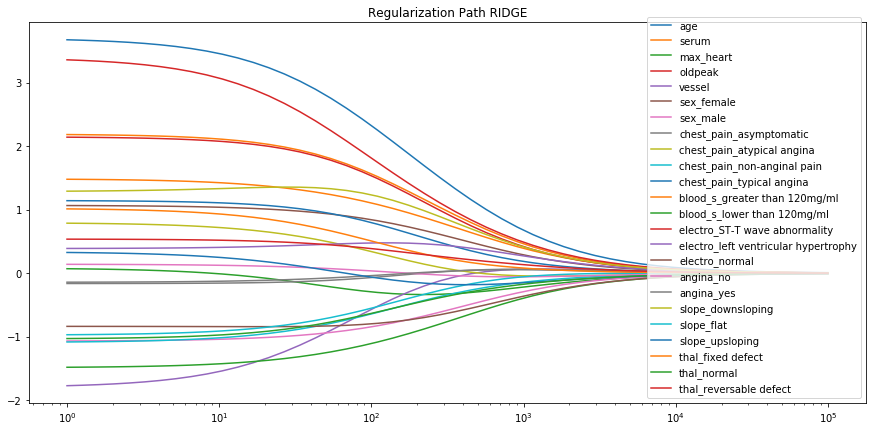

In [34]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Se observa que todas las variables convergen a cero conforme se avanza en el eje X. Sin embargo dada la dimensionalidad del modelo, se hace dificil ver qué variables tardan más en converger y cuales menos. Edad parece ser la que más tarda de todas en converger, esto se corrobora observando la tabla obtenida en el inciso G

> k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

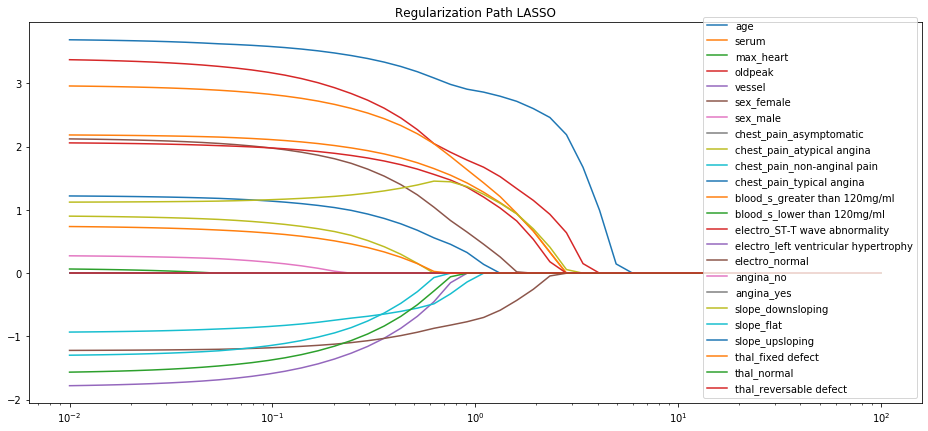

In [33]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
names_regressors = df.columns
plt.figure(figsize=(16,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

De misma forma que en el apartado G, podemos notar que aquellas variables que se consideran mas importantes llegan a su valor 0 despues que aquellas que presentan valores minimos en los apartados de pesos, Z-score y F-score, como son el caso de la edad, la cual converge ultimo, el oldpeak y el serum, penultimo y antepenultimo respectivamente. Dado lo anterior, se puede decir que Lasso permite ver con mayor claridad la importancia de cada variable, y esto lo hace utilizando un valor menor del parámetro de regularización.

> l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?


In [37]:
from ipywidgets import interactive
def train_model(param, model):
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max), model = [Ridge(fit_intercept=True, solver='svd'), Lasso(fit_intercept=True)])

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Dropdown(description='model', …

   - Para Ridge, el valor de alpha para el instante anterior en el cual el MSE del conjunto de training comienza a aumentar es $\alpha= 1$ por lo tanto es la mejor opción a escoger.
   - Para Lasso, el valor de alpha para el instante anterior en el cual el MSE del conjunto de training comienza a aumentar es $\alpha= -1$ por lo tanto es la mejor opción a escoger.
   - Esto supone una diferencia de 2 órdenes de magnitud entre los modelos.

> m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [18]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]


selected = age ...
totalvars=2, mse = 300.159978
selected = slope_downsloping ...
totalvars=3, mse = 290.470506
selected = electro_ST-T wave abnormality ...
totalvars=4, mse = 284.618970
selected = serum ...
totalvars=5, mse = 279.587430
selected = blood_s_greater than 120mg/ml ...
totalvars=6, mse = 275.297670
selected = oldpeak ...
totalvars=7, mse = 271.730415
selected = vessel ...
totalvars=8, mse = 269.396124
selected = chest_pain_non-anginal pain ...
totalvars=9, mse = 267.395934
selected = sex_female ...
totalvars=10, mse = 265.175946
selected = electro_normal ...
totalvars=11, mse = 263.871372
selected = chest_pain_asymptomatic ...
totalvars=12, mse = 262.426018
selected = thal_normal ...
totalvars=13, mse = 261.104377
selected = slope_flat ...
totalvars=14, mse = 259.919532
selected = chest_pain_atypical angina ...
totalvars=15, mse = 259.704707
selected = angina_no ...
totalvars=16, mse = 259.633150
selected = max_heart ...
totalvars=17, mse = 259.629299
selected = chest_pain

> n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

> o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?


In [19]:
D = #number of fake features
F = np.random.normal(loc = mu, scale = std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

SyntaxError: invalid syntax (<ipython-input-19-731831965cf8>, line 1)

### Detectar una enfermedad 
Con toda la información obtenida de la experimentación previa, deberá hacer la predicción de la enfermedad cardíaca, ésto es un problema binario de clasificación de dos clases (presencia o ausencia de la enfermedad). Para explorar la hipótesis que le fue entregada en un inicio, de que el comportamiento anormal (*outlier*) de presión sanguínea sobre las personas es un indicio de alguna enfermedad, deberá utilizar los datos de los pacientes que se encuentran sanos (comportamiento normal).

> p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.


In [20]:
mask_norm = class_label_train == 0 
model = #choose yor model..
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
...
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

SyntaxError: invalid syntax (<ipython-input-20-b3cc4bf95520>, line 2)

> q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).


In [21]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)

NameError: name 'blood_p_tr' is not defined

> r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*


In [22]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

NameError: name 'pred_train' is not defined

> s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.


In [23]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8315217391304348
Score test:  0.8023255813953488


> t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).


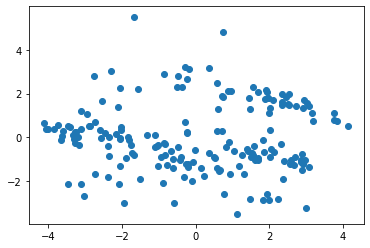

In [24]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

> u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente


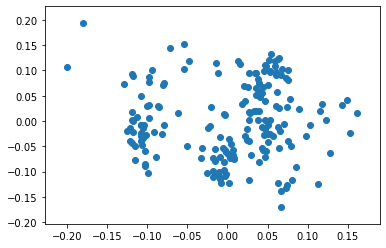

In [25]:
from sklearn.decomposition import FastICA
d = 2
pca_model = FastICA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

> v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente